In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
datapath = "/content/MyDrive/MyDrive/fyp/dataset"

In [ ]:
print(datapath)

/content/MyDrive/MyDrive/fyp/dataset


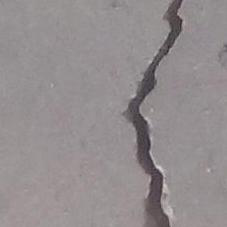

In [ ]:
from PIL import Image
pos = '/content/MyDrive/MyDrive/fyp/dataset/Train/Positive/00004.jpg'
image = Image.open(pos)
image.show()



In [ ]:
data_dir = "/content/MyDrive/MyDrive/fyp/dataset/Train"
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5952 files belonging to 2 classes.
Using 4762 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5952 files belonging to 2 classes.
Using 1190 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Negative', 'Positive']


In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='sigmoid'))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 2)                1026      
 pper)                                                           
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
____________________________________

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# epochs=10
# history = resnet_model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )

Epoch 1/10
149/149 [==============================] - 26s 137ms/step - loss: 0.0166 - accuracy: 0.9935 - val_loss: 0.0292 - val_accuracy: 0.9950
Epoch 2/10
149/149 [==============================] - 20s 129ms/step - loss: 3.8285e-04 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 0.9983
Epoch 3/10
149/149 [==============================] - 20s 128ms/step - loss: 6.2370e-05 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 0.9975
Epoch 4/10
149/149 [==============================] - 20s 128ms/step - loss: 2.4278e-05 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 0.9983
Epoch 5/10
149/149 [==============================] - 19s 128ms/step - loss: 1.4652e-05 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 0.9983
Epoch 6/10
149/149 [==============================] - 20s 129ms/step - loss: 8.1529e-06 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 0.9983
Epoch 7/10
149/149 [==============================] - 19s 128ms/step - loss: 7.1384e-06 - accuracy: 1.0000 - v

In [ ]:
# resnet_model.save_weights('/content/MyDrive/MyDrive/fyp/Train_ResNet50.h5')

In [ ]:
# resnet_model.save('/content/MyDrive/MyDrive/fyp/train_Resnet50.h5')

In [ ]:
resnet_model.load_weights('/content/MyDrive/MyDrive/fyp/Train_ResNet50.h5') 

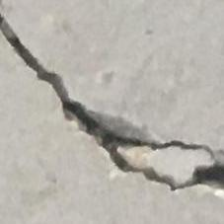

(1, 224, 224, 3)


In [ ]:
import cv2
from PIL import Image
img = "/content/MyDrive/MyDrive/fyp/dataset/Train/Positive/03765.jpg"
image=cv2.imread(img)
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
pil_image = Image.fromarray(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
pil_image.show()
# print(image.shape)

In [ ]:
pred=resnet_model.predict(image)
# print(pred)

1/1 [==============================] - 1s 1s/step
[[0.31289056 0.37336415]]


In [ ]:
import numpy as np
from PIL import Image
output_class=class_names[np.argmax(pred)]
#from IPython.display import display
#image = Image.open(img)
#display(image)
 
print("The predicted class is", output_class)

The predicted class is Positive


In [ ]:
import cv2
import numpy as np
from PIL import Image

def highlight_crack(image_path, model):
    # Load and preprocess the image
    img_height, img_width = 224, 224
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (img_height, img_width))
    image_normalized = image_resized / 255.0  # Normalize the image
    image = np.expand_dims(image_normalized, axis=0)

    # Perform prediction
    pred = model.predict(image)
    output_class = np.argmax(pred)
    class_names = ['Negative', 'Positive'] 

    # Visualize the predicted class
    #print("The predicted class is", class_names[output_class])

    # Highlight crack in the image
    crack_mask = pred[..., output_class]  # Extract the predicted crack mask
    crack_mask = np.squeeze(crack_mask)  # Remove the batch dimension if present
    crack_mask = cv2.resize(crack_mask, (image.shape[2], image.shape[1]))  # Resize mask to original image size
    crack_mask = (crack_mask * 255).astype(np.uint8)  # Scale mask to 0-255 range

    # Apply the crack mask as an overlay on the original image
    overlay = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
    overlay[..., 0] += crack_mask
    overlay[..., 1] -= crack_mask
    overlay = np.clip(overlay, 0, 255).astype(np.uint8)

    # Display the result
    pil_image = Image.fromarray(overlay)
    pil_image.show()


1/1 [==============================] - 0s 229ms/step


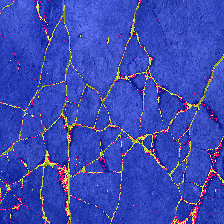

In [ ]:

image_path = "/content/MyDrive/MyDrive/fyp/Test/crack3.jpg"
highlight_crack(image_path, resnet_model)